In [54]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [55]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    train_loss = 0.0
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    avg_loss = train_loss / len(dataloader)
    return avg_loss

In [56]:
def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    train_loss = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")

        avg_loss = train_loop(test_dataloader, model, loss_fn, optimizer)
        train_loss.append(avg_loss)
    print("Done!")

    return train_loss

In [57]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

Для задачи в качестве оптимизационных методов выбраны: SGD RMSprop Adam

In [58]:
learning_rate = 1e-3
epochs = 50
loss_fn = nn.CrossEntropyLoss()

model_sgd = NeuralNetwork()
optimizer_sgd = torch.optim.SGD(model_sgd.parameters(), lr=learning_rate)
train_loss_sgd = run_training(epochs, train_dataloader, model_sgd, loss_fn, optimizer_sgd)
print(f"Loss SGD: {train_loss_sgd}")

model_rms = NeuralNetwork()
optimizer_rms = torch.optim.RMSprop(model_rms.parameters(), lr=learning_rate, alpha=0.9)
train_loss_rms = run_training(epochs, train_dataloader, model_rms, loss_fn, optimizer_rms)
print(f"Loss RMSprop: {train_loss_rms}")

model_adam = NeuralNetwork()
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=learning_rate)
train_loss_adam = run_training(epochs, train_dataloader, model_adam, loss_fn, optimizer_adam)
print(f"Loss Adam: {train_loss_adam}")

Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Epoch 6
-------------------------------
Epoch 7
-------------------------------
Epoch 8
-------------------------------
Epoch 9
-------------------------------
Epoch 10
-------------------------------
Epoch 11
-------------------------------
Epoch 12
-------------------------------
Epoch 13
-------------------------------
Epoch 14
-------------------------------
Epoch 15
-------------------------------
Epoch 16
-------------------------------
Epoch 17
-------------------------------
Epoch 18
-------------------------------
Epoch 19
-------------------------------
Epoch 20
-------------------------------
Epoch 21
-------------------------------
Epoch 22
-------------------------------
Epoch 23
-------------------------------
Epoch 24
-------------------------------
Epoch 25
----------------

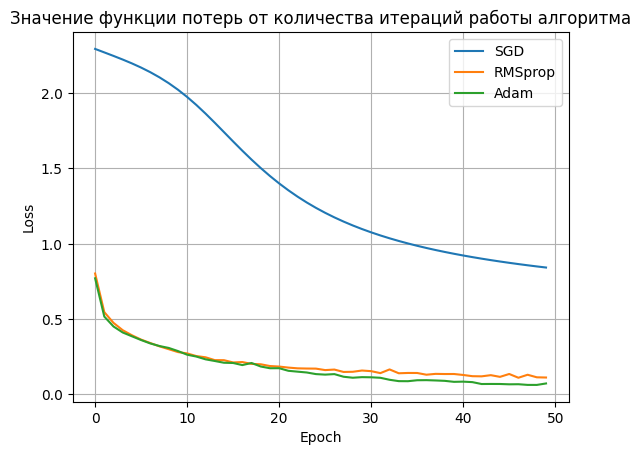

In [60]:
import matplotlib.pyplot as plt

plt.plot(train_loss_sgd, label="SGD")
plt.plot(train_loss_rms, label="RMSprop")
plt.plot(train_loss_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Значение функции потерь от количества итераций работы алгоритма")
plt.legend()
plt.grid(True)
plt.show()

Сравнения и выводы

По скорости сходимиости: Adam ≈ RMSprop > SGD

По итоговому значению потерь: Adam достигает наименьших потерь, RMSprop близок к нему. SGD, несмотря на устойчивую сходимость, отстает по итоговым значениям.

По стабильности сходимости: RMSprop и Adam в отличии от SGD показывают более гладкую и стабильную сходимость.

Оптимизатор Adam демонстрирует наибольшую эффективность, обеспечивая быструю и стабильную сходимость. Он быстрее достигает минимальных значений функции потерь по сравнению с RMSprop и SGD, а также отличается высокой стабильностью.

RMSprop также показывает хорошие результаты, обладая стабильной сходимостью, но немного уступает Adam по скорости уменьшения функции потерь.

SGD значительно отстает от Adam и RMSprop. Его скорость сходимости гораздо ниже, а на начальных этапах наблюдаются заметные колебания значений функции потерь.